In [ ]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset=pd.read_csv('trainkagglex.csv')

In [ ]:
print(dataset.shape)

(54273, 13)


In [ ]:
dataset.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [ ]:
#Dealing with missing values
features_with_nan=[features for features in dataset.columns if dataset[features].isnull().sum()>=1]

for features in features_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'%missing value')

In [ ]:
#so no null values present

In [ ]:
#now finding out how many features are actually numerical features
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
print("The no. of numerical features is:-",(len(numerical_features)))

The no. of numerical features is:- 4


In [ ]:
dataset['model_age']=dataset['model_year']-1974

In [ ]:
dataset.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,model_age
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,44
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,33
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,35
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,48
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,27


In [ ]:
dataset.drop(columns=['model_year'],inplace=True)

In [ ]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
print("The no. of numerical features is:-",(len(numerical_features)))

The no. of numerical features is:- 4


In [ ]:
dataset[numerical_features].head()

,id,milage,price,model_age
0,0,74349,11000,44
1,1,80000,8250,33
2,2,91491,15000,35
3,3,2437,63500,48
4,4,111000,7850,27


In [ ]:
dataset[numerical_features]['model_year'].min()

KeyError: 'model_year'

In [ ]:
dataset[numerical_features].head()

In [ ]:
dataset.head()

In [ ]:
#trying to determine if ther is any relation between the age of model and the price
dataset.groupby('model_age')['price'].median().plot()
plt.xlabel('Age of the model')
plt.ylabel('Price')
plt.title('Age of model v/s Price')
plt.show()

In [ ]:
#determning the discrete numerical varaibles
discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_features]
for feature in discrete_features:
    print("Discrete variable : {} ".format(feature))
print("Discrete Variable count:- {}".format(len(discrete_features)))

In [ ]:
#no discrete variables so all are continuous numerical variables
#continuous numerical variables
continuous_variables=[feature for feature in numerical_features if feature not in discrete_features]
print("Continuous variables count: {}".format(len(continuous_variables)))

In [ ]:
continuous_variables

In [ ]:
#determining the relationship between the continuous numerical features and the output feature
for feature in continuous_variables:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()


In [ ]:
#all plots have non gaussian curves and so the data is skewed.
#using the logarathmic distribution to convert eh non gaussian distribution into gaussian distribution
data=dataset.copy()
for feature in continuous_variables:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

In [ ]:
#checking for the outliers
for feature in continuous_variables:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        #to know more about the outliers in the data we make use of boxplot
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel('Feature Value')
        plt.title(feature)
        plt.show()

In [ ]:
#categorical features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print("The categorical features count:- {}".format(len(categorical_features)))

In [ ]:
categorical_features

In [ ]:
dataset[categorical_features].head()

In [ ]:
for feature in categorical_features:
    print("The feature is {} and number if categories are {}".format(feature, len(dataset[feature].unique())))

In [ ]:
#as all the entries in the clean_title are yes so we can remove it
#determining the relationship between the categoricsl features and the output that is SalesPrice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

In [ ]:
numerical_features

In [ ]:
for feature in ['milage']:
    dataset[feature]=np.log(dataset[feature])

In [ ]:
dataset.head()

In [ ]:
#handling the rare categorical features
categorical_features

In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'rare variable')

In [ ]:
dataset.head(100)

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head(100)

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['id', 'price']]

In [ ]:
feature_scale

In [ ]:
dataset.replace([np.inf, -np.inf], 9999, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dataset[feature_scale])

In [ ]:
data=pd.concat([dataset[['id','price']].reset_index(drop=True),pd.DataFrame(scaler.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [ ]:
data.head()

In [ ]:
data.to_csv('kagglexfinaltrain.csv',index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
scaler2.fit(dataset[feature_scale])

In [ ]:
data2=pd.concat([dataset[['id','price']].reset_index(drop=True),pd.DataFrame(scaler2.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [ ]:
data2.head()

In [ ]:
data2.to_csv('kagglexfinaltrain2.csv',index=False)

# for data1

1)Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df1=pd.read_csv('kagglexfinaltrain.csv')

In [ ]:
df1.head()

In [ ]:
price2=df1.pop('price')

In [ ]:
df1.insert(len(df1.columns),'price',price2)

In [ ]:
df1.head()

In [ ]:
x=df1.iloc[:,:-1]
y=df1.price

In [ ]:
x.head()

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
model1=LinearRegression()
model1.fit(x_train,y_train)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
y_pred1=model1.predict(x_test)

In [ ]:
y_pred1

In [ ]:
for i in range(len(y_pred1)):
    y_pred1[i]=np.exp(y_pred1[i])

In [ ]:
y_pred1

In [ ]:
for i in range(len(y_pred1)):
    y_pred1[i]=1000*y_pred1[i]

In [ ]:
y_pred1

In [ ]:
id_range=range(54273, 54273+len(y_pred1))

In [ ]:
result1=pd.DataFrame({'id':id_range,'price':y_pred1})

In [ ]:
result1.head()

In [ ]:
result1.shape

In [ ]:
df2=pd.read_csv('testkagglex.csv')

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
x_train1=df1.iloc[:,:-1]
y_train1=df1.price

In [ ]:
x_test1=df2.iloc

In [ ]:
model2=LinearRegression()

In [ ]:
model2.fit(x_train1,y_train1)

In [ ]:
prediction1=model2.predict(x_test1)

In [ ]:
df2.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [ ]:
features_with_nan=[features for features in df2.columns if df2[features].isnull().sum()>1]
for feature in features_with_nan:
    print(feature,np.round(df2[feature].isnull().mean(),4),'%missing value')

In [ ]:
numerical_features=[feature for feature in df2.columns if df2[feature].dtype!='O']
print( "The no. of numerical features is ",len(numerical_features))

In [ ]:
df2[numerical_features].head()

In [ ]:
df2[numerical_features]['model_year'].min()

In [ ]:
df2['model_age']=df2['model_year']-1974

In [ ]:
df2.drop(columns=['model_year'],inplace=True)

In [ ]:
df2.head()

In [ ]:
numerical_features=[feature for feature in df2.columns if df2[feature].dtype!='O']
print( "The no. of numerical features is ",len(numerical_features))

In [ ]:
df2[numerical_features].head()

In [ ]:
discrete_features=[feature for feature in numerical_features if len(df2[feature].unique())<25 and feature not in year_features]
for feature in discrete_features:
    print("Discrete variable : {} ".format(feature))
print("Discrete Variable count:- {}".format(len(discrete_features)))

In [ ]:
continuous_variables=[feature for feature in numerical_features if feature not in discrete_features]
print("Continuous variables count: {}".format(len(continuous_variables)))

In [ ]:
df2[continuous_variables].head()

In [ ]:
categorical=[feature for feature in df2.columns if df2[feature].dtypes=='O']
print("The categorical features count:- {}".format(len(categorical)))

In [ ]:
df2[categorical].head()

In [ ]:
for feature in categorical:
    print("The feature is {} and number if categories are {}".format(feature, len(df2[feature].unique())))

In [ ]:
numerical_features

In [ ]:
df2[numerical_features].head()

In [ ]:
for feature in ['id','milage']:
    df2[feature]=np.log(df2[feature])

In [ ]:
df2.head()

In [ ]:
categorical

In [ ]:
for feature in categorical:
    labels_ordered=df2.groupby([feature])['id'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df2[feature]=df2[feature].map(labels_ordered)

In [ ]:
df2.head()

In [ ]:
feature_scale=[feature for feature in df2.columns if feature not in ['id']]

In [ ]:
feature_scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
scaler1.fit(df2[feature_scale])

In [ ]:
testdata1=pd.concat([df2['id'].reset_index(drop=True),
                   pd.DataFrame(scaler1.transform(df2[feature_scale]),columns=feature_scale)],
                  axis=1)

In [ ]:
testdata1.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()
scaler2.fit(df2[feature_scale])


In [ ]:
testdata2=pd.concat([df2['id'].reset_index(drop=True),
                   pd.DataFrame(scaler2.transform(df2[feature_scale]),columns=feature_scale)],
                  axis=1)

In [ ]:
testdata2.head()

In [ ]:
testdata1.to_csv('kagglexfinaltest1.csv',index=False)

In [ ]:
testdata2.to_csv('kagglexfinaltest2.csv',index=False)

# Final Prediction

# Linear Regression

In [ ]:
dftrain1=pd.read_csv('kagglexfinaltrain.csv')

In [ ]:
dftrain1.head()

In [ ]:
price2=dftrain1.pop('price')
dftrain1.insert(len(dftrain1.columns),'price',price2)

In [ ]:
dftrain1.head()

In [ ]:
x_train1=dftrain1.iloc[:,:-1]
y_train1=dftrain1.price

In [ ]:
x_train1.head()

In [ ]:
y_train1

In [ ]:
x_test1=pd.read_csv('kagglexfinaltest1.csv')

In [ ]:
x_test1.head()

In [ ]:
x_train1.shape

In [ ]:
x_test1.shape

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [ ]:
model1.fit(x_train1,y_train1)

In [ ]:
prediction1=model1.predict(x_test1)

In [ ]:
prediction1

In [ ]:
for i in range(len(prediction1)):
    prediction1[i]=np.exp(prediction1[i])

In [ ]:
prediction1

In [ ]:
for i in range(len(prediction1)):
    prediction1[i]=prediction1[i]*1000

In [ ]:
prediction1

In [ ]:
id_range=range(54273,54273+len(prediction1))

In [ ]:
result1=pd.DataFrame({'id':id_range,'price':prediction1})

In [ ]:
result1.head()

In [ ]:
result1.shape

In [ ]:
result1.to_csv('KaggleXPrediction1.csv',index=False)

In [ ]:
x_test2=pd.read_csv('kagglexfinaltest2.csv')

In [ ]:
x_test2.head()

In [ ]:
x_test2.shape

In [ ]:
prediction2=model1.predict(x_test2)

In [ ]:
prediction2

In [ ]:
for i in range(len(prediction2)):
    prediction2[i]=np.exp(prediction2[i])

In [ ]:
for i in range(len(prediction2)):
    prediction2[i]=prediction2[i]*1000

In [ ]:
prediction2

In [ ]:
result2=pd.DataFrame({'id':id_range,'price':prediction2})

In [ ]:
result2.head()

In [ ]:
result2.to_csv('KaggleXPrediction2.csv',index=False)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model2=Lasso()

In [ ]:
parameters={'alpha':[0.01,0.5,0.75,1,2,5,25,50,30,60,80,90,100,1000]}
lassocv=GridSearchCV(model2,parameters,scoring='neg_mean_squared_error', cv=5)
lassocv.fit(x_train1,y_train1)

In [ ]:
prediction3=lassocv.predict(x_test1)

In [ ]:
prediction3

In [ ]:
for i in range(len(prediction3)):
    prediction3[i]=np.exp(prediction3[i])


In [ ]:
for i in range(len(prediction3)):
    prediction3[i]=prediction3[i]*1000

In [ ]:
prediction3

In [ ]:
result3=pd.DataFrame({'id':id_range,'price':prediction3})

In [ ]:
result3.head()

In [ ]:
result3.to_csv('KaggleXPrediction3.csv',index=False)

In [ ]:
prediction4=lassocv.predict(x_test2)

In [ ]:
prediction4

In [ ]:
for i in range(len(prediction4)):
    prediction4[i]=np.exp(prediction4[i])


In [ ]:
for i in range(len(prediction4)):
    prediction4[i]=prediction4[i]*1000

In [ ]:
prediction4

In [ ]:
result4=pd.DataFrame({'id':id_range,'price':prediction4})

In [ ]:
result4.head()

In [ ]:
result4.shape

In [ ]:
result4.to_csv('KaggleXPrediction4.csv',index=False)

# Decision Tree Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dftrain1=pd.read_csv('kagglexfinaltrain.csv')

In [ ]:
price2=dftrain1.pop('price')
dftrain1.insert(len(dftrain1.columns),'price',price2)

In [ ]:
dftrain1.head()

In [ ]:
x_train1=dftrain1.iloc[:,:-1]
y_train1=dftrain1.price

In [ ]:
x_test1=pd.read_csv('kagglexfinaltest1.csv')

In [ ]:
x_test2=pd.read_csv('kagglexfinaltest2.csv')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()

In [ ]:
#performing hyper parameter tuning
parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_weight_fraction_leaf': [0.01, 0.05, 0.1, 0.2],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
regressorcv=RandomizedSearchCV(model3,parameters,cv=5,scoring='neg_mean_squared_error')

In [ ]:
regressorcv.fit(x_train1,y_train1)

In [ ]:
regressorcv.best_params_

In [ ]:
prediction5=regressorcv.predict(x_test1)

In [ ]:
prediction5

In [ ]:
prediction6=regressorcv.predict(x_test2)

In [ ]:
prediction6

In [ ]:
for i in range(len(prediction5)):
    prediction5[i]=np.exp(prediction5[i])

In [ ]:
for i in range(len(prediction6)):
    prediction6[i]=np.exp(prediction6[i])

In [ ]:
for i in range(len(prediction5)):
    prediction5[i]=prediction5[i]*1000

In [ ]:
for i in range(len(prediction6)):
    prediction6[i]=prediction6[i]*1000

In [ ]:
prediction5

In [ ]:
prediction6

In [ ]:
id_range=range(54273,54273+len(prediction5))

In [ ]:
result5=pd.DataFrame({'id':id_range,'price':prediction5})

In [ ]:
result6=pd.DataFrame({'id':id_range,'price':prediction6})

In [ ]:
result5

In [ ]:
result6

In [ ]:
result6.to_csv('KaggleXPrediction6.csv',index=False)

In [ ]:
dftrain2=pd.read_csv('kagglexfinaltrain2.csv')

In [ ]:
dftrain2.head()

In [ ]:
price3=dftrain2.pop('price')
dftrain2.insert(len(dftrain2.columns),'price',price3)

In [ ]:
x_train2=dftrain2.iloc[:,:-1]
y_train2=dftrain2.price

In [ ]:
x_train2.head()

In [ ]:
y_train2

In [ ]:
regressorcv.fit(x_train2,y_train2)

In [ ]:
regressorcv.best_params_

In [ ]:
prediction7=regressorcv.predict(x_test1)

In [ ]:
prediction7

In [ ]:
prediction8=regressorcv.predict(x_test2)

In [ ]:
prediction8

In [ ]:
for i in range(len(prediction7)):
    prediction7[i]=np.exp(prediction7[i])

In [ ]:
for i in range(len(prediction8)):
    prediction8[i]=np.exp(prediction8[i])

In [ ]:
for i in range(len(prediction7)):
    prediction7[i]=prediction7[i]*1000

In [ ]:
for i in range(len(prediction8)):
    prediction8[i]=prediction8[i]*1000

In [ ]:
prediction7

In [ ]:
prediction8

In [ ]:
result7=pd.DataFrame({'id':id_range,'price':prediction7})

In [ ]:
result8=pd.DataFrame({'id':id_range,'price':prediction8})

In [ ]:
result7.to_csv('KaggleXPrediction7.csv',index=False)

In [ ]:
result8.to_csv('KaggleXPrediction8.csv',index=False)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
model4=Ridge()

In [ ]:
parameters={'alpha':[1,2,5,25,50,30,60,80,90]}
ridgecv=GridSearchCV(model4,parameters,scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(x_train2,y_train2)

In [ ]:
ridgecv.best_score_

In [ ]:
prediction9=ridgecv.predict(x_test2)

In [ ]:
prediction9

In [ ]:
for i in range(len(prediction9)):
    prediction9[i]=np.exp(prediction9[i])

In [ ]:
for i in range(len(prediction9)):
    prediction9[i]=prediction9[i]*1000

In [ ]:
prediction9

In [ ]:
prediction10=ridgecv.predict(x_test1)

In [ ]:
prediction10

In [ ]:
for i in range(len(prediction10)):
    prediction10[i]=np.exp(prediction10[i])

In [ ]:
for i in range(len(prediction10)):
    prediction10[i]=prediction10[i]*1000

In [ ]:
prediction10

In [ ]:
prediction9

In [ ]:
result9=pd.DataFrame({'id':id_range,'price':prediction9})

In [ ]:
result10=pd.DataFrame({'id':id_range,'price':prediction10})

In [ ]:
result9.to_csv('KaggleXPrediction9.csv',index=False)

In [ ]:
result10.to_csv('KaggleXPrediction10.csv',index=False)

# Using Adaboost Regressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name 'mplDeprecation' from 'matplotlib._api.deprecation' (C:\Anaconda 3\lib\site-packages\matplotlib\_api\deprecation.py)

In [ ]:
dftrain1=pd.read_csv('kagglexfinaltrain.csv')

In [ ]:
dftrain2=pd.read_csv('kagglexfinaltrain2.csv')

In [ ]:
price2=dftrain1.pop('price')
dftrain1.insert(len(dftrain1.columns),'price',price2)

In [ ]:
price3=dftrain2.pop('price')
dftrain2.insert(len(dftrain2.columns),'price',price3)

In [ ]:
dftrain1.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_age,price
0,0,0.254360,-0.105668,0.373504,-0.042821,3.474822,2.293265,-0.792789,-1.665041,0.600302,0.0,0.520325,2.230622
1,1,0.751613,-0.105668,0.433090,-0.042821,-1.301599,-0.043508,-0.300809,0.203173,0.600302,0.0,-1.447877,2.199219
2,2,-0.408643,-0.105668,0.541262,-0.042821,-0.240172,-0.627701,1.175128,-1.042303,0.600302,0.0,-1.090022,2.263408
3,3,0.751613,-0.105668,-2.953252,3.820892,-0.240172,0.248589,1.667107,0.825912,0.600302,0.0,1.236035,2.403226
4,4,-0.242892,-0.105668,0.694834,-0.042821,-0.240172,-0.919798,0.191170,0.203173,0.600302,0.0,-2.521442,2.193693


In [ ]:
dftrain2.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_age,price
0,0,0.708333,0.333333,0.863484,0.5,0.833333,1.000000,0.285714,0.000000,1.0,0.0,0.88,2.230622
1,1,0.833333,0.333333,0.869798,0.5,0.083333,0.428571,0.428571,0.428571,1.0,0.0,0.66,2.199219
2,2,0.541667,0.333333,0.881262,0.5,0.250000,0.285714,0.857143,0.142857,1.0,0.0,0.70,2.263408
3,3,0.833333,0.333333,0.510941,1.0,0.250000,0.500000,1.000000,0.571429,1.0,0.0,0.96,2.403226
4,4,0.583333,0.333333,0.897536,0.5,0.250000,0.214286,0.571429,0.428571,1.0,0.0,0.54,2.193693


In [ ]:
xtrain1=dftrain1.iloc[:,:-1]
ytrain1=dftrain1.price

In [ ]:
xtrain2=dftrain2.iloc[:,:-1]
ytrain2=dftrain2.price

In [ ]:
x_test1=pd.read_csv('kagglexfinaltest1.csv')

In [ ]:
x_test2=pd.read_csv('kagglexfinaltest2.csv')

In [ ]:
type(xtrain2)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
base_estimator = DecisionTreeRegressor(random_state=42)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'base_estimator__max_depth': [1, 2, 3, 4,5,10,20]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model5= GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
xtrain_subset = xtrain2[:100]
ytrain_subset = ytrain2[:100]

print("Starting model training on subset...")
model5.fit(xtrain_subset, ytrain_subset)
print("Model training on subset completed.")

Starting model training on subset...
Model training on subset completed.


In [ ]:
prediction11=model5.predict(x_test2)

In [ ]:
prediction11

array([2.33194609, 2.24162854, 2.42555176, ..., 2.32090133, 2.30142036,
       2.22263537])

In [ ]:
for i in range(len(prediction11)):
    prediction11[i]=np.exp(prediction11[i])

In [ ]:
for i in range(len(prediction11)):
    prediction11[i]=1000*prediction11[i]

In [ ]:
prediction11

array([10297.96277578,  9408.6411283 , 11308.46722785, ...,
       10184.85009224,  9988.35947535,  9231.62761093])

In [ ]:
id_range=range(54273,54273+len(prediction11))

In [ ]:
result11=pd.DataFrame({'id':id_range,'price':prediction11})

In [ ]:
result11.to_csv('KaggleXPrediction11.csv',index=False)

# Using XGBoost

In [ ]:
!pip install --upgrade matplotlib


     ---------------------------------------- 7.9/7.9 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.4
    Uninstalling matplotlib-3.8.4:
      Successfully uninstalled matplotlib-3.8.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda 3\\Lib\\site-packages\\~atplotlib.libs\\msvcp140-456d948669199b545d061b84c160bebc.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: cannot import name 'mplDeprecation' from 'matplotlib._api.deprecation' (C:\Anaconda 3\lib\site-packages\matplotlib\_api\deprecation.py)

In [ ]:
!pip uninstall matplotlib -y

Found existing installation: matplotlib 3.9.0
Uninstalling matplotlib-3.9.0:
  Successfully uninstalled matplotlib-3.9.0


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Anaconda 3\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Anaconda 3\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\Anaconda 3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\Anaconda 3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\Anaconda 3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Anaconda 3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\Anaconda 3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(retry_state=retry_state)
  File "C:\Anaconda 3\lib\site-packages\pip\_v

In [ ]:
!pip install matplotlib==3.9.0

  Using cached matplotlib-3.9.0-cp39-cp39-win_amd64.whl (7.9 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires matplotlib<3.9,>=3.2, but you have matplotlib 3.9.0 which is incompatible.
ydata-profiling 4.8.3 requires pydantic>=2, but you have pydantic 1.10.7 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
xtrain1.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_age
0,0,0.254360,-0.105668,0.373504,-0.042821,3.474822,2.293265,-0.792789,-1.665041,0.600302,0.0,0.520325
1,1,0.751613,-0.105668,0.433090,-0.042821,-1.301599,-0.043508,-0.300809,0.203173,0.600302,0.0,-1.447877
2,2,-0.408643,-0.105668,0.541262,-0.042821,-0.240172,-0.627701,1.175128,-1.042303,0.600302,0.0,-1.090022
3,3,0.751613,-0.105668,-2.953252,3.820892,-0.240172,0.248589,1.667107,0.825912,0.600302,0.0,1.236035
4,4,-0.242892,-0.105668,0.694834,-0.042821,-0.240172,-0.919798,0.191170,0.203173,0.600302,0.0,-2.521442


In [ ]:
xtrain2.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_age
0,0,0.708333,0.333333,0.863484,0.5,0.833333,1.000000,0.285714,0.000000,1.0,0.0,0.88
1,1,0.833333,0.333333,0.869798,0.5,0.083333,0.428571,0.428571,0.428571,1.0,0.0,0.66
2,2,0.541667,0.333333,0.881262,0.5,0.250000,0.285714,0.857143,0.142857,1.0,0.0,0.70
3,3,0.833333,0.333333,0.510941,1.0,0.250000,0.500000,1.000000,0.571429,1.0,0.0,0.96
4,4,0.583333,0.333333,0.897536,0.5,0.250000,0.214286,0.571429,0.428571,1.0,0.0,0.54


In [ ]:
x_test1.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_age
0,10.901782,0.538462,0.580447,0.793724,0.5,0.612343,0.581395,0.506550,0.563636,1.0,0.0,0.80
1,10.901801,0.519231,0.392179,0.861360,0.5,0.404050,0.418605,0.475983,0.554545,1.0,0.0,0.82
2,10.901819,0.538462,0.417318,0.752847,0.5,0.558341,0.372093,0.532751,0.518182,1.0,0.0,0.82
3,10.901837,0.346154,0.260894,0.684644,0.5,0.507232,0.325581,0.506550,0.518182,0.0,0.0,0.88
4,10.901856,0.596154,0.350279,0.818927,0.5,0.378978,0.418605,0.506550,0.554545,0.0,0.0,0.92


In [ ]:
x_test2.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,model_age
0,10.901782,0.322717,0.431370,0.355992,0.006573,0.651496,0.834276,0.234380,0.186767,0.600304,0.0,-0.190357
1,10.901801,0.219643,-0.514020,0.873512,0.006573,-0.540798,-0.507973,-0.334851,-0.054084,0.600304,0.0,-0.011442
2,10.901819,0.322717,-0.387781,0.043223,0.006573,0.342383,-0.891473,0.722292,-1.017487,0.600304,0.0,-0.011442
3,10.901837,-0.708016,-1.173267,-0.478632,0.006573,0.049829,-1.274973,0.234380,-1.017487,-1.665821,0.0,0.525302
4,10.901856,0.631936,-0.724418,0.548835,0.006573,-0.684315,-0.507973,0.234380,-0.054084,-1.665821,0.0,0.883131


In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30,0.35],
    "max_depth":[3,4,5,6,7,8,10,12],
    "colsample_bytree":[0.3,0.4,0.5,0.6,0.7]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost

In [ ]:
model6=xgboost.XGBRegressor()

In [ ]:
random_search=RandomizedSearchCV(model6,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(xtrain2,ytrain2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Anaconda 3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
C:\Anaconda 3\lib\site-packages\sklearn\model_selection\_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
            

In [ ]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model6=xgboost.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [ ]:
model6.fit(xtrain2,ytrain2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction12=model6.predict(x_test2)

XGBoostError: [10:37:33] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\include\xgboost/json.h:630: Invalid type for: `missing`, expecting one of the: {``Number`, `Integer`}, got: `Null`

In [ ]:
prediction12

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gemma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=None, mmin_child_weight=7,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [ ]:
print(prediction12)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gemma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=None, mmin_child_weight=7,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kagglexfinaltest1.csv to kagglexfinaltest1.csv
Saving kagglexfinaltest2.csv to kagglexfinaltest2.csv
Saving kagglexfinaltrain.csv to kagglexfinaltrain.csv
Saving kagglexfinaltrain2.csv to kagglexfinaltrain2.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train1=pd.read_csv('kagglexfinaltrain.csv')

In [ ]:
train2=pd.read_csv('kagglexfinaltrain2.csv')

In [ ]:
test1=pd.read_csv('kagglexfinaltest1.csv')

In [ ]:
test2=pd.read_csv('kagglexfinaltest2.csv')

In [ ]:
price2=train1.pop('price')
train1.insert(len(train1.columns),'price',price2)

In [ ]:
price3=train2.pop('price')
train2.insert(len(train2.columns),'price',price3)

In [ ]:
xtrain1=train1.iloc[:,:-1]
ytrain1=train1.price

In [ ]:
xtrain2=train2.iloc[:,:-1]
ytrain2=train2.price

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
base_estimator = DecisionTreeRegressor(random_state=42)
adaboost = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'base_estimator__max_depth': [1, 2, 3, 4,5,10,20]
}

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
model5= GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
xtrain2.shape

(54273, 12)

In [ ]:
ytrain2.shape

(54273,)

In [ ]:
model5.fit(xtrain2,ytrain2)

KeyboardInterrupt: 

In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30,0.35],
    "max_depth":[3,4,5,6,7,8,10,12],
    "colsample_bytree":[0.3,0.4,0.5,0.6,0.7]
}

In [ ]:
import xgboost

In [ ]:
model6=xgboost.XGBRegressor()

In [ ]:
random_search=RandomizedSearchCV(model6,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(xtrain2,ytrain2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10,
                                                      12]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model6=xgboost.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None,  monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [ ]:
model6.fit(xtrain2,ytrain2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction12=model6.predict(test2)

In [ ]:
prediction12

array([2.3805628, 2.2554274, 2.3466368, ..., 2.3063731, 2.2400582,
       2.2137473], dtype=float32)

In [ ]:
for i in range(len(prediction12)):
  prediction12[i]=np.exp(prediction12[i])

In [ ]:
for i in range(len(prediction12)):
  prediction12[i]=1000*prediction12[i]

In [ ]:
id_range=range(54273,54273+len(prediction12))

In [ ]:
result12=pd.DataFrame({'id':id_range,'price':prediction12})

In [ ]:
result12.head()

,id,price
0,54273,10810.985352
1,54274,9539.369141
2,54275,10450.364258
3,54276,9209.408203
4,54277,10681.933594


In [ ]:
result12.to_csv('KaggleXPrediction12.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXPrediction12.csv'

In [ ]:
result12.to_csv(file_path, index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving testkagglex.csv to testkagglex.csv
Saving trainkagglex.csv to trainkagglex.csv


In [ ]:
train=pd.read_csv('trainkagglex.csv')
test=pd.read_csv('testkagglex.csv')

In [ ]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [ ]:
for col in train.columns:
  print( col,": ",len(train[col].unique()),'labels')

id :  54273 labels
brand :  53 labels
model :  1827 labels
model_year :  34 labels
milage :  3212 labels
fuel_type :  7 labels
engine :  1061 labels
transmission :  46 labels
ext_col :  260 labels
int_col :  124 labels
accident :  2 labels
clean_title :  1 labels
price :  1481 labels


In [ ]:
train.drop('price',axis=1, inplace=True)

In [ ]:
train['model_year'].min()

1974

In [ ]:
train['age_model']=train['model_year']-1974

In [ ]:
train.drop('model_year',axis=1, inplace=True)

In [ ]:
train.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age_model
0,0,Ford,F-150 Lariat,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,44
1,1,BMW,335 i,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,33
2,2,Jaguar,XF Luxury,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,35
3,3,BMW,X7 xDrive40i,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,48
4,4,Pontiac,Firebird Base,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,27


In [ ]:
train.brand.value_counts().sort_values(ascending=False).head(20)

brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Name: count, dtype: int64

In [ ]:
train.model.value_counts().sort_values(ascending=False).head(20)

model
F-150 XLT                   780
M3 Base                     682
X5 xDrive35i                615
F-150 Lariat                496
Mustang GT Premium          466
Camaro 2SS                  417
E-Class E 350 4MATIC        397
E-Class E 350               388
M4 Base                     383
Corvette Base               361
Wrangler Unlimited Sport    358
Wrangler Sport              350
X5 xDrive40i                349
911 Carrera S               326
Explorer XLT                298
X6 M Base                   296
911 Carrera                 290
F-250 Lariat                289
GX 460 Base                 283
Corvette Stingray w/2LT     274
Name: count, dtype: int64

In [ ]:
train.milage.value_counts().sort_values(ascending=False).head(20)

milage
60000     361
120000    341
110000    335
170000    320
40000     303
50000     290
87500     276
39000     261
55000     256
48000     235
92000     230
134000    224
45000     222
106000    221
130000    221
74000     216
90000     209
65000     203
41000     191
96000     185
Name: count, dtype: int64

In [ ]:
brand_freq_map=train.brand.value_counts().to_dict()
train.brand=train.brand.map(brand_freq_map)

In [ ]:
train.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age_model
0,0,6706,F-150 Lariat,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,44
1,1,7369,335 i,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,33
2,2,661,XF Luxury,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,35
3,3,7369,X7 xDrive40i,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,48
4,4,149,Firebird Base,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,27


In [ ]:
model_freq_map=train.model.value_counts().to_dict()
train.model=train.model.map(model_freq_map)

In [ ]:
train.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age_model
0,0,6706,496,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,44
1,1,7369,229,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,33
2,2,661,21,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,35
3,3,7369,180,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,48
4,4,149,16,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,27


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
unique_milage=sorted(train['milage'].unique())

In [ ]:
unique_age=sorted(train['age_model'].unique())

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(unique_milage)

LabelEncoder()

In [ ]:
train['milage_encoded']=le.transform(train['milage'])

In [ ]:
le.fit(unique_age)

LabelEncoder()

In [ ]:
train['age_encoded']=le.transform(train['age_model'])

In [ ]:
train.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age_model,milage_encoded,age_encoded
0,0,6706,496,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,44,2070,27
1,1,7369,229,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,33,2187,16
2,2,661,21,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,35,2376,18
3,3,7369,180,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,48,146,31
4,4,149,16,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,27,2632,10


In [ ]:
train.drop('milage',axis=1,inplace=True)

In [ ]:
train.drop('age_model',axis=1,inplace=True)

In [ ]:
temp=pd.read_csv('trainkagglex.csv')

In [ ]:
price=temp['price']

In [ ]:
price

0         11000
1          8250
2         15000
3         63500
4          7850
          ...  
54268     29000
54269      6500
54270     18950
54271    194965
54272     37499
Name: price, Length: 54273, dtype: int64

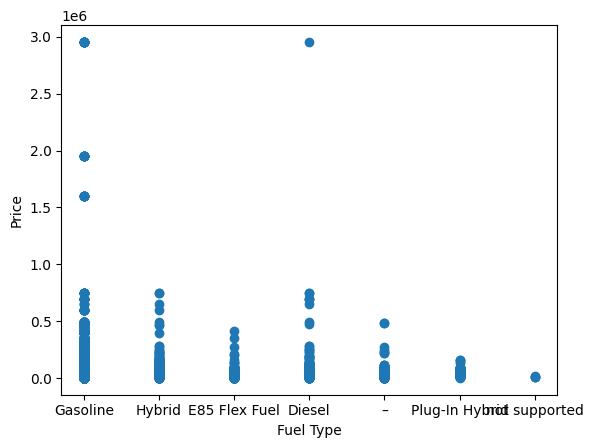

In [ ]:
plt.scatter(temp['fuel_type'], temp['price'])
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

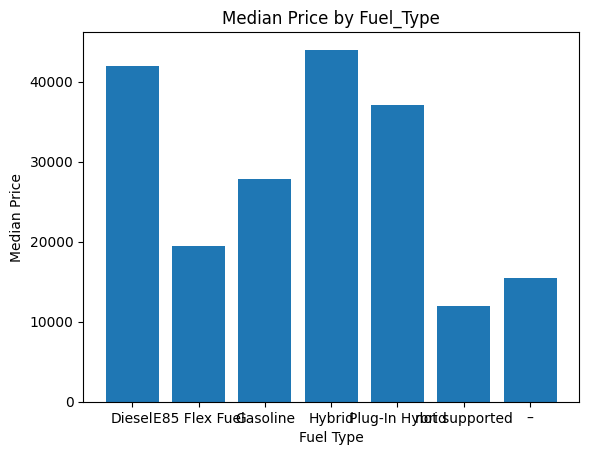

In [ ]:
engine_medians = temp.groupby('fuel_type')['price'].median()

# Create a bar plot
plt.bar(engine_medians.index, engine_medians.values)
plt.xlabel('Fuel Type')
plt.ylabel('Median Price')
plt.title('Median Price by Fuel_Type')
plt.show()

In [ ]:
train['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [ ]:
fueltype_map={'Hybrid':1,'Diesel':2,'Plug-In Hybrid':3,'Gasoline':4,'E85 Flex Fuel':5,'-':6,'not supported':7}
train['fuel_type_ordinal']=train['fuel_type'].map(fueltype_map)

In [ ]:
train.head()

,id,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal
0,0,6706,496,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,2070,27,4.0
1,1,7369,229,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,2187,16,4.0
2,2,661,21,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,2376,18,4.0
3,3,7369,180,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,146,31,1.0
4,4,149,16,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,2632,10,4.0


In [ ]:
train.drop('fuel_type',axis=1, inplace=True)

In [ ]:
train.shape

(54273, 12)

In [ ]:
engine_freq_map=train.engine.value_counts().to_dict()
train.engine=train.engine.map(engine_freq_map)

In [ ]:
train.head()

,id,brand,model,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal
0,0,6706,496,684,10-Speed A/T,Blue,Gray,None reported,Yes,2070,27,4.0
1,1,7369,229,1452,6-Speed M/T,Black,Black,None reported,Yes,2187,16,4.0
2,2,661,21,105,6-Speed A/T,Purple,Beige,None reported,Yes,2376,18,4.0
3,3,7369,180,227,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,146,31,1.0
4,4,149,16,112,A/T,White,Black,None reported,Yes,2632,10,4.0


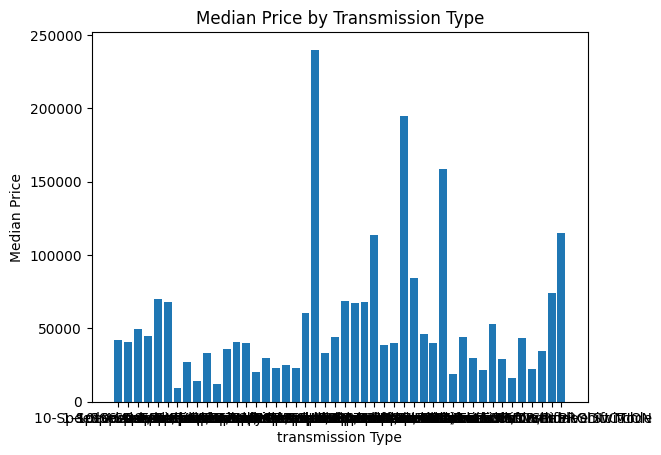

In [ ]:
trans_medians = temp.groupby('transmission')['price'].median()

# Create a bar plot
plt.bar(trans_medians.index, trans_medians.values)
plt.xlabel('transmission Type')
plt.ylabel('Median Price')
plt.title('Median Price by Transmission Type')
plt.show()

In [ ]:
trans_medians

transmission
1-Speed A/T                                            41799.0
1-Speed Automatic                                      40643.0
10-Speed A/T                                           49500.0
10-Speed Automatic                                     44605.0
10-Speed Automatic with Overdrive                      69999.0
2-Speed A/T                                            67999.0
4-Speed A/T                                             9500.0
4-Speed Automatic                                      27173.0
5-Speed A/T                                            14000.0
5-Speed Automatic                                      33498.5
5-Speed M/T                                            12000.0
6 Speed At/Mt                                          35707.0
6 Speed Mt                                             40452.5
6-Speed                                                39951.0
6-Speed A/T                                            19995.0
6-Speed Automatic                         

In [ ]:
train.transmission=train.transmission.map(trans_medians)

In [ ]:
train.head()

,id,brand,model,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal
0,0,6706,496,684,49500.0,Blue,Gray,None reported,Yes,2070,27,4.0
1,1,7369,229,1452,23000.0,Black,Black,None reported,Yes,2187,16,4.0
2,2,661,21,105,19995.0,Purple,Beige,None reported,Yes,2376,18,4.0
3,3,7369,180,227,34500.0,Gray,Brown,None reported,Yes,146,31,1.0
4,4,149,16,112,18998.0,White,Black,None reported,Yes,2632,10,4.0


In [ ]:
unique_trans=sorted(train['transmission'].unique())

In [ ]:
le.fit(unique_trans)

LabelEncoder()

In [ ]:
train['transmission_encoded']=le.transform(train['transmission'])

In [ ]:
train.head()

,id,brand,model,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded
0,0,6706,496,684,49500.0,Blue,Gray,None reported,Yes,2070,27,4.0,31
1,1,7369,229,1452,23000.0,Black,Black,None reported,Yes,2187,16,4.0,9
2,2,661,21,105,19995.0,Purple,Beige,None reported,Yes,2376,18,4.0,5
3,3,7369,180,227,34500.0,Gray,Brown,None reported,Yes,146,31,1.0,17
4,4,149,16,112,18998.0,White,Black,None reported,Yes,2632,10,4.0,4


In [ ]:
train.drop('transmission',axis=1, inplace=True)

In [ ]:
ext_col_medians = temp.groupby('ext_col')['price'].median()
int_col_medians = temp.groupby('int_col')['price'].median()

In [ ]:
train.ext_col=train.ext_col.map(ext_col_medians)
train.int_col=train.int_col.map(int_col_medians)

In [ ]:
train.head()

,id,brand,model,engine,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded
0,0,6706,496,684,29500.0,16500.0,None reported,Yes,2070,27,4.0,31
1,1,7369,229,1452,27500.0,30000.0,None reported,Yes,2187,16,4.0,9
2,2,661,21,105,15450.0,18500.0,None reported,Yes,2376,18,4.0,5
3,3,7369,180,227,33000.0,35000.0,None reported,Yes,146,31,1.0,17
4,4,149,16,112,28000.0,30000.0,None reported,Yes,2632,10,4.0,4


In [ ]:
unique_ext_col=sorted(train['ext_col'].unique())
unique_int_col=sorted(train['int_col'].unique())

In [ ]:
le.fit(unique_ext_col)

LabelEncoder()

In [ ]:
train['ext_col_encoded']=le.transform(train['ext_col'])

In [ ]:
le.fit(unique_int_col)

LabelEncoder()

In [ ]:
train['int_col_encoded']=le.transform(train['int_col'])

In [ ]:
train.head()

,id,brand,model,engine,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,0,6706,496,684,29500.0,16500.0,None reported,Yes,2070,27,4.0,31,57,3
1,1,7369,229,1452,27500.0,30000.0,None reported,Yes,2187,16,4.0,9,42,25
2,2,661,21,105,15450.0,18500.0,None reported,Yes,2376,18,4.0,5,9,6
3,3,7369,180,227,33000.0,35000.0,None reported,Yes,146,31,1.0,17,83,42
4,4,149,16,112,28000.0,30000.0,None reported,Yes,2632,10,4.0,4,45,25


In [ ]:
train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [ ]:
accident_map={'None reported':1,'At least 1 accident or damage reported':2}
train.accident=train.accident.map(accident_map)

In [ ]:
train.head()

,id,brand,model,engine,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,0,6706,496,684,29500.0,16500.0,1,Yes,2070,27,4.0,31,57,3
1,1,7369,229,1452,27500.0,30000.0,1,Yes,2187,16,4.0,9,42,25
2,2,661,21,105,15450.0,18500.0,1,Yes,2376,18,4.0,5,9,6
3,3,7369,180,227,33000.0,35000.0,1,Yes,146,31,1.0,17,83,42
4,4,149,16,112,28000.0,30000.0,1,Yes,2632,10,4.0,4,45,25


In [ ]:
test=pd.read_csv('testkagglex.csv')

In [ ]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [ ]:
test['clean_title'].unique()

array(['Yes'], dtype=object)

In [ ]:
train.drop('clean_title',axis=1, inplace=True)

In [ ]:
train.drop('ext_col',axis=1, inplace=True)

In [ ]:
train.drop('int_col',axis=1, inplace=True)

In [ ]:
train.shape

(54273, 11)

In [ ]:
train.columns

Index(['id', 'brand', 'model', 'engine', 'accident', 'milage_encoded',
       'age_encoded', 'fuel_type_ordinal', 'transmission_encoded',
       'ext_col_encoded', 'int_col_encoded'],
      dtype='object')

In [ ]:
train['price']=price

In [ ]:
train.head()

,id,brand,model,engine,accident,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded,price
0,0,6706,496,684,1,2070,27,4.0,31,57,3,11000
1,1,7369,229,1452,1,2187,16,4.0,9,42,25,8250
2,2,661,21,105,1,2376,18,4.0,5,9,6,15000
3,3,7369,180,227,1,146,31,1.0,17,83,42,63500
4,4,149,16,112,1,2632,10,4.0,4,45,25,7850


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXtrain.csv'
train.to_csv(file_path, index=False)

In [ ]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [ ]:
test['model_year'].min()

1974

In [ ]:
test['age_model']=test['model_year']-1974

In [ ]:
test.drop('model_year',axis=1, inplace=True)

In [ ]:
brand_freq_map=test.brand.value_counts().to_dict()
test.brand=test.brand.map(brand_freq_map)

In [ ]:
test.head()

,id,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,age_model
0,54273,3265,E-Class E 350,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,40
1,54274,1530,RX 350 Base,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,41
2,54275,3265,C-Class C 300,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,41
3,54276,1360,Rover Range Rover 5.0L Supercharged Autobiogra...,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,44
4,54277,4854,X6 xDrive40i,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,46


In [ ]:
model_freq_map=test.model.value_counts().to_dict()
test.model=test.model.map(model_freq_map)

In [ ]:
unique_milage=sorted(test['milage'].unique())

In [ ]:
unique_age=sorted(test['age_model'].unique())

In [ ]:
le.fit(unique_milage)

LabelEncoder()

In [ ]:
test['milage_encoded']=le.transform(test['milage'])

In [ ]:
le.fit(unique_age)

LabelEncoder()

In [ ]:
test['age_encoded']=le.transform(test['age_model'])

In [ ]:
test.drop('milage',axis=1, inplace=True)

In [ ]:
test.drop('age_model',axis=1,inplace=True)

In [ ]:
test['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Diesel', 'Hybrid', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [ ]:
fueltype_map={'Hybrid':1,'Diesel':2,'Plug-In Hybrid':3,'Gasoline':4,'E85 Flex Fuel':5,'-':6,'not supported':7}
test['fuel_type_ordinal']=test['fuel_type'].map(fueltype_map)

In [ ]:
test.head()

,id,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal
0,54273,3265,255,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,1887,23,4.0
1,54274,1530,122,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,2570,24,4.0
2,54275,3265,30,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,1486,24,4.0
3,54276,1360,27,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,979,27,4.0
4,54277,4854,116,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,2164,29,4.0


In [ ]:
test.drop('fuel_type',axis=1,inplace=True)

In [ ]:
engine_freq_map=test.engine.value_counts().to_dict()
test.engine=test.engine.map(engine_freq_map)

In [ ]:
test.head()

,id,brand,model,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal
0,54273,3265,255,385,A/T,White,Beige,None reported,Yes,1887,23,4.0
1,54274,1530,122,11,8-Speed A/T,Silver,Black,None reported,Yes,2570,24,4.0
2,54275,3265,30,186,7-Speed A/T,Blue,White,None reported,Yes,1486,24,4.0
3,54276,1360,27,127,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,979,27,4.0
4,54277,4854,116,390,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,2164,29,4.0


In [ ]:
temp2=pd.read_csv('testkagglex.csv')

In [ ]:
test.transmission=test.transmission.map(trans_medians)

In [ ]:
test.head()

,id,brand,model,engine,transmission,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal
0,54273,3265,255,385,18998.0,White,Beige,None reported,Yes,1887,23,4.0
1,54274,1530,122,11,38500.0,Silver,Black,None reported,Yes,2570,24,4.0
2,54275,3265,30,186,33000.0,Blue,White,None reported,Yes,1486,24,4.0
3,54276,1360,27,127,34500.0,White,White,At least 1 accident or damage reported,Yes,979,27,4.0
4,54277,4854,116,390,38500.0,White,Black,At least 1 accident or damage reported,Yes,2164,29,4.0


In [ ]:
unique_trans=sorted(test['transmission'].unique())

In [ ]:
le.fit(unique_trans)

LabelEncoder()

In [ ]:
test['transmission_encoded']=le.transform(test['transmission'])

In [ ]:
test.drop('transmission',axis=1, inplace=True)

In [ ]:
test.head()

,id,brand,model,engine,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded
0,54273,3265,255,385,White,Beige,None reported,Yes,1887,23,4.0,4
1,54274,1530,122,11,Silver,Black,None reported,Yes,2570,24,4.0,18
2,54275,3265,30,186,Blue,White,None reported,Yes,1486,24,4.0,15
3,54276,1360,27,127,White,White,At least 1 accident or damage reported,Yes,979,27,4.0,17
4,54277,4854,116,390,White,Black,At least 1 accident or damage reported,Yes,2164,29,4.0,18


In [ ]:
test.ext_col=test.ext_col.map(ext_col_medians)
test.int_col=test.int_col.map(int_col_medians)

In [ ]:
unique_ext_col=sorted(test['ext_col'].unique())
unique_int_col=sorted(test['int_col'].unique())

In [ ]:
le.fit(unique_ext_col)

LabelEncoder()

In [ ]:
test['ext_col_encoded']=le.transform(test['ext_col'])

In [ ]:
le.fit(unique_int_col)

LabelEncoder()

In [ ]:
test['int_col_encoded']=le.transform(test['int_col'])

In [ ]:
test.head()

,id,brand,model,engine,ext_col,int_col,accident,clean_title,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,54273,3265,255,385,28000.0,18500.0,None reported,Yes,1887,23,4.0,4,35,6
1,54274,1530,122,11,19600.0,30000.0,None reported,Yes,2570,24,4.0,18,13,21
2,54275,3265,30,186,29500.0,37400.0,None reported,Yes,1486,24,4.0,15,46,44
3,54276,1360,27,127,28000.0,37400.0,At least 1 accident or damage reported,Yes,979,27,4.0,17,35,44
4,54277,4854,116,390,28000.0,30000.0,At least 1 accident or damage reported,Yes,2164,29,4.0,18,35,21


In [ ]:
test.drop('ext_col',axis=1, inplace=True)
test.drop('int_col',axis=1,inplace=True)

In [ ]:
test.shape

(36183, 12)

In [ ]:
accident_map={'None reported':1,'At least 1 accident or damage reported':2}
test.accident=test.accident.map(accident_map)

In [ ]:
test.drop('clean_title',axis=1, inplace=True)

In [ ]:
test.head()

,id,brand,model,engine,accident,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,54273,3265,255,385,1,1887,23,4.0,4,35,6
1,54274,1530,122,11,1,2570,24,4.0,18,13,21
2,54275,3265,30,186,1,1486,24,4.0,15,46,44
3,54276,1360,27,127,2,979,27,4.0,17,35,44
4,54277,4854,116,390,2,2164,29,4.0,18,35,21


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXtest.csv'
test.to_csv(file_path, index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving KaggleXtrain.csv to KaggleXtrain.csv


In [ ]:
traindf=pd.read_csv('KaggleXtrain.csv')

In [ ]:
traindf.head()

,id,brand,model,engine,accident,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded,price
0,0,6706,496,684,1,2070,27,4.0,31,57,3,11000
1,1,7369,229,1452,1,2187,16,4.0,9,42,25,8250
2,2,661,21,105,1,2376,18,4.0,5,9,6,15000
3,3,7369,180,227,1,146,31,1.0,17,83,42,63500
4,4,149,16,112,1,2632,10,4.0,4,45,25,7850


In [ ]:
xtrain=traindf.iloc[:,:-1]

In [ ]:
xtrain.head()

,id,brand,model,engine,accident,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,0,6706,496,684,1,2070,27,4.0,31,57,3
1,1,7369,229,1452,1,2187,16,4.0,9,42,25
2,2,661,21,105,1,2376,18,4.0,5,9,6
3,3,7369,180,227,1,146,31,1.0,17,83,42
4,4,149,16,112,1,2632,10,4.0,4,45,25


In [ ]:
xtrain.isnull().sum()

id                        0
brand                     0
model                     0
engine                    0
accident                  0
milage_encoded            0
age_encoded               0
fuel_type_ordinal       294
transmission_encoded      0
ext_col_encoded           0
int_col_encoded           0
dtype: int64

In [ ]:
xtrain['fuel_type_ordinal'].unique()

array([ 4.,  1.,  5.,  2., nan,  3.,  7.])

In [ ]:
xtrain['fuel_type_ordinal'].fillna(6,inplace=True)

In [ ]:
xtrain['fuel_type_ordinal'].unique()

array([4., 1., 5., 2., 6., 3., 7.])

In [ ]:
ytrain=traindf.price

In [ ]:
ytrain

0         11000
1          8250
2         15000
3         63500
4          7850
          ...  
54268     29000
54269      6500
54270     18950
54271    194965
54272     37499
Name: price, Length: 54273, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
xtrain_scaled=scaler.fit_transform(xtrain)

In [ ]:
xtrain.head()

,id,brand,model,engine,accident,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,0,6706,496,684,1,2070,27,4.0,31,57,3
1,1,7369,229,1452,1,2187,16,4.0,9,42,25
2,2,661,21,105,1,2376,18,4.0,5,9,6
3,3,7369,180,227,1,146,31,1.0,17,83,42
4,4,149,16,112,1,2632,10,4.0,4,45,25


In [ ]:
xtrain_scaled

array([[-1.73201889,  1.26947063,  2.30651775, ...,  2.2401067 ,
         0.22069821, -1.3121496 ],
       [-1.73195507,  1.53598008,  0.6233404 , ..., -0.28920907,
        -0.28890655,  0.15566089],
       [-1.73189124, -1.16046854, -0.68789888, ..., -0.74908467,
        -1.41003702, -1.11199363],
       ...,
       [ 1.73189124, -0.37018559, -0.1142317 , ...,  0.63054212,
        -0.1869856 ,  0.15566089],
       [ 1.73195507, -0.37018559, -0.70050695, ...,  3.73470239,
        -1.64785258,  1.28987809],
       [ 1.73201889, -0.25160295, -0.80767555, ...,  0.86047992,
        -0.28890655,  0.15566089]])

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving KaggleXtest.csv to KaggleXtest.csv


In [ ]:
testdf=pd.read_csv('KaggleXtest.csv')

In [ ]:
testdf.head()

,id,brand,model,engine,accident,milage_encoded,age_encoded,fuel_type_ordinal,transmission_encoded,ext_col_encoded,int_col_encoded
0,54273,3265,255,385,1,1887,23,4.0,4,35,6
1,54274,1530,122,11,1,2570,24,4.0,18,13,21
2,54275,3265,30,186,1,1486,24,4.0,15,46,44
3,54276,1360,27,127,2,979,27,4.0,17,35,44
4,54277,4854,116,390,2,2164,29,4.0,18,35,21


In [ ]:
testdf.isnull().sum()

id                        0
brand                     0
model                     0
engine                    0
accident                  0
milage_encoded            0
age_encoded               0
fuel_type_ordinal       197
transmission_encoded      0
ext_col_encoded           0
int_col_encoded           0
dtype: int64

In [ ]:
testdf['fuel_type_ordinal'].unique()

array([ 4.,  5.,  2.,  1., nan,  3.,  7.])

In [ ]:
testdf['fuel_type_ordinal'].fillna(6,inplace=True)

In [ ]:
testdf_scaled=scaler.transform(testdf)

In [ ]:
testdf_scaled

array([[ 1.73208272, -0.11372551,  0.78724531, ..., -0.86405356,
        -0.5267221 , -1.11199363],
       [ 1.73214655, -0.81115222, -0.05119135, ...,  0.74551102,
        -1.27414242, -0.11121375],
       [ 1.73221038, -0.11372551, -0.63116257, ...,  0.40060432,
        -0.15301194,  1.42331541],
       ...,
       [ 4.04135614, -0.79346532, -0.53660204, ..., -1.20896026,
        -1.64785258, -1.3121496 ],
       [ 4.04141997, -1.22679442, -0.39791327, ...,  2.01016891,
        -0.62864305,  3.29143785],
       [ 4.0414838 , -0.22306273, -0.41052134, ..., -0.86405356,
        -0.62864305, -0.11121375]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}


In [ ]:
model7=LinearRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=model7, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
model7.fit(xtrain_scaled,ytrain)

LinearRegression()

In [ ]:
prediction13=model7.predict(testdf_scaled)

In [ ]:
prediction13

array([30872.37942204, 28632.24704788, 51479.08496512, ...,
       16672.174047  , 69547.55791202, 11523.49179391])

In [ ]:
prediction13.shape

(36183,)

In [ ]:
id_range=range(54273,54273+len(prediction13))

In [ ]:
result13=pd.DataFrame({'id':id_range,'price':prediction13})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXPrediction13.csv'
result13.to_csv(file_path, index=False)

In [ ]:
model7.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
prediction14=model7.predict(testdf)

In [ ]:
prediction14

array([30872.37942204, 28632.24704788, 51479.08496512, ...,
       16672.174047  , 69547.55791203, 11523.49179391])

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model8=Ridge()

In [ ]:
parameters={'alpha':[1,2,5,25,50,30,60,80,90]}
ridgecv=GridSearchCV(model8,parameters,scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 25, 50, 30, 60, 80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 90}


In [ ]:
print(ridgecv.best_score_)

-4828091126.399796


In [ ]:
prediction15=ridgecv.predict(testdf_scaled)

In [ ]:
prediction15

array([30872.32022169, 28666.97588578, 51468.11362546, ...,
       16688.5396825 , 69534.89013056, 11549.99259438])

In [ ]:
result15=pd.DataFrame({'id':id_range,'price':prediction15})

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXPrediction15.csv'
result15.to_csv(file_path, index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model9=RandomForestRegressor()

In [ ]:
param_grid2 = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [10, 20, None],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

In [ ]:
grid_search2= GridSearchCV(estimator=model9, param_grid=param_grid2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
model9.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model10=Lasso()

In [ ]:
parameters={'alpha':[1,2,5,25,50,30,60,80,90]}
lassocv=GridSearchCV(model10,parameters,scoring='neg_mean_squared_error', cv=5)
lassocv.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 25, 50, 30, 60, 80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
prediction16=lassocv.predict(testdf_scaled)

In [ ]:
prediction16

array([30917.66808089, 28616.51612289, 51514.03862095, ...,
       16829.16974817, 69509.8384299 , 11754.34054018])

In [ ]:
id_range=range(54273,54273+len(prediction16))

In [ ]:
result16=pd.DataFrame({'id':id_range,'price':prediction16})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXPrediction16.csv'
result16.to_csv(file_path, index=False)

In [ ]:
lassocv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 25, 50, 30, 60, 80, 90]},
             scoring='neg_mean_squared_error')

In [ ]:
prediction17=lassocv.predict(testdf)

In [ ]:
result17=pd.DataFrame({'id':id_range,'price':prediction17})

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXPrediction17.csv'
result17.to_csv(file_path, index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from scipy.stats import randint

In [ ]:
param_dist = {
    'n_neighbors': randint(2, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
model11=KNeighborsRegressor()

In [ ]:
random_search = RandomizedSearchCV(estimator=model11, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)


In [34]:
subset_size = int(0.3 * len(xtrain_scaled))  # Use 30% of the training data as a subset
subset_indices = np.random.choice(len(xtrain_scaled), subset_size, replace=False)
xtrain_scaled_subset = xtrain_scaled[subset_indices]
ytrain_subset = ytrain[subset_indices]

In [35]:
random_search.fit(xtrain_scaled_subset,ytrain_subset)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79952594feb0>,
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error')

In [36]:
best_params=random_search.best_params_

In [37]:
best_params

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [38]:
bettermodel11=random_search.best_estimator_

In [39]:
bettermodel11.fit(xtrain_scaled,ytrain)

KNeighborsRegressor(metric='manhattan', n_neighbors=9, weights='distance')

In [40]:
prediction18=bettermodel11.predict(testdf_scaled)

In [41]:
prediction18

array([27861.96854281, 23086.49649465, 36092.45246423, ...,
       10605.17659092, 44485.65749561, 15317.49422398])

In [42]:
id_range=range(54273,54273+len(prediction18))

In [43]:
result18=pd.DataFrame({'id':id_range, "price":prediction18})

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
file_path = '/content/drive/My Drive/Colab Notebooks/KaggleXPrediction18.csv'
result18.to_csv(file_path, index=False)